In [ ]:
# Import library yang diperlukan
from ultralytics import YOLO
import cv2
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import Video, display
import shutil
import requests

# import utils function
from shelf_utils import *

In [ ]:
# Setup path dan folder
video_path = '../sample_video/sample.mp4'

# Buat folder untuk menyimpan frame dan hasil
frames_dir = 'extracted_frames'
results_dir = 'segmented_frames'
output_video = 'results/shelf_segmentation_result.mp4'

# Buat folder result jika belum ada
os.makedirs('results', exist_ok=True)

# Buat direktori jika belum ada
os.makedirs(frames_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

print(f'Video input: {video_path}')
print(f'Frames directory: {frames_dir}')
print(f'Results directory: {results_dir}')
print(f'Output video: {output_video}')

Video input: ../sample_video/sample.mp4
Model repository: cheesecz/shelf-segmentation
Frames directory: extracted_frames
Results directory: segmented_frames
Output video: shelf_segmentation_result.mp4


In [4]:
# Load model dari file lokal
model_path = 'model/best.pt'

# Cek apakah model file ada
if not os.path.exists(model_path):
    raise FileNotFoundError(f'Model tidak ditemukan di: {model_path}')

print(f'Loading model from: {model_path}')

# Load model YOLO
model = YOLO(model_path)
print('Model loaded successfully!')

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


best.pt:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

Model downloaded successfully: C:\Users\legion\.cache\huggingface\hub\models--cheesecz--shelf-segmentation\snapshots\a832e8c4ba6ddcf039ef79e96d4357a30cf50463\best.pt
Loading YOLO model...
Model loaded successfully!


In [ ]:
# Ekstraksi frame dari video
print('Extracting frames from video...')
frame_paths, video_fps, video_width, video_height = extract_frames_from_video(video_path, frames_dir)

Extracting frames from video...
Video info: 261 frames, 13 FPS, 1270x720
Extracted 100/261 frames
Extracted 200/261 frames
Total 261 frames extracted


In [ ]:
# Proses semua frame dengan model
processed_frame_paths = process_frames_with_model(frame_paths, model, results_dir)

Processing 261 frames with YOLO model...

0: 384x640 8 shelfs, 233.1ms
Speed: 5.8ms preprocess, 233.1ms inference, 204.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 shelfs, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 shelfs, 14.3ms
Speed: 2.0ms preprocess, 14.3ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 shelfs, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 shelfs, 12.9ms
Speed: 1.5ms preprocess, 12.9ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 shelfs, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 shelfs, 19.5ms
Speed: 1.8ms preprocess, 19.5ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 shelfs, 11.1ms
Speed: 1.6ms preprocess, 11.1ms inference, 3

In [ ]:
# Buat video dari frame yang sudah diproses
create_video_from_frames(processed_frame_paths, output_video, video_fps, video_width, video_height)

Creating video: shelf_segmentation_result.mp4
Video specs: 13 FPS, 1270x720
Written 100/261 frames to video
Written 200/261 frames to video
Video created successfully: shelf_segmentation_result.mp4


Showing sample results...


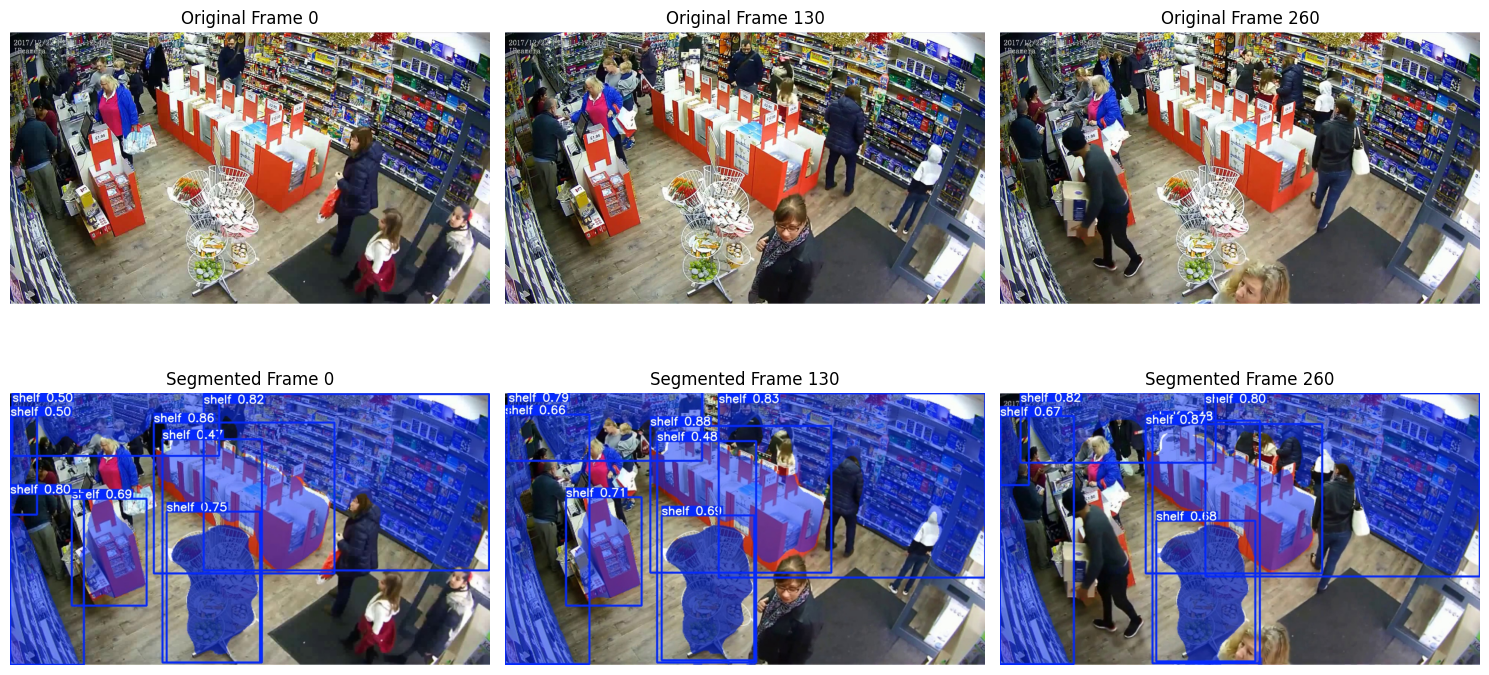

In [ ]:
# Tampilkan sample hasil
print('Showing sample results...')
show_sample_results(frame_paths, processed_frame_paths)

In [9]:
# Tampilkan video hasil
print('\n=== HASIL AKHIR ===')
print(f'Video asli: {video_path}')
print(f'Video hasil segmentasi: {output_video}')
print(f'Total frame diproses: {len(frame_paths)}')

# Tampilkan video hasil (jika di Jupyter)
if os.path.exists(output_video):
    print('\nVideo hasil segmentasi:')
    display(Video(output_video, width=640, height=480))
else:
    print('Video hasil tidak ditemukan!')


=== HASIL AKHIR ===
Video asli: ../sample_video/sample.mp4
Video hasil segmentasi: shelf_segmentation_result.mp4
Total frame diproses: 261

Video hasil segmentasi:


In [11]:
# Cleanup - hapus folder frame sementara jika diinginkan
cleanup = input('Hapus folder frame sementara? (y/n): ')

if cleanup.lower() == 'y':
    print('Cleaning up temporary folders...')
    shutil.rmtree(frames_dir)
    shutil.rmtree(results_dir)
    print('Cleanup completed!')
else:
    print('Temporary folders kept for inspection.')
    print(f'Original frames: {frames_dir}')
    print(f'Processed frames: {results_dir}')

Cleaning up temporary folders...
Cleanup completed!
